<a href="https://colab.research.google.com/github/Harsha1919/Graduate-Rotational-Internship-Program-Tasks/blob/main/Prediction_using_Unsupervised_ML_Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### *Task#2* : **To Explore Unsupervised Machine Learning**

#### *Importing all the necessary libraries required for the task*

In [136]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [137]:
from google.colab import files
uploaded = files.upload()

Saving Iris.csv to Iris (6).csv


In [138]:
# Loading the dataset

import io
dt = pd.read_csv(io.BytesIO(uploaded['Iris.csv']))

In [139]:
dt

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [140]:
dt.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [141]:
dt.shape

(150, 6)

In [142]:
dt.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [143]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [144]:
dt.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [145]:
dt.drop_duplicates(inplace=True)
dt.drop(['Id'],axis=1,inplace=True)

#### *Label Encoder*

In [146]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dt['Species']=le.fit_transform(dt['Species'])
dt['Species'].value_counts()

2    50
1    50
0    50
Name: Species, dtype: int64

In [147]:
dt.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.782561,-0.419446,0.949043,0.956464,1.000000


In [148]:
# Here we can get number of unique in each column

dt.nunique()

SepalLengthCm    35
SepalWidthCm     23
PetalLengthCm    43
PetalWidthCm     22
Species           3
dtype: int64

Text(0.5, 0, 'Species')

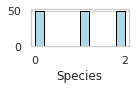

In [149]:
plt.subplot(5,3,1)
plt.hist(dt.Species, color='lightblue', edgecolor = 'black')
plt.xlabel('Species')

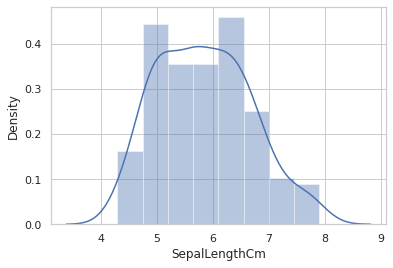

In [150]:
sns.distplot(dt['SepalLengthCm'])
plt.show()

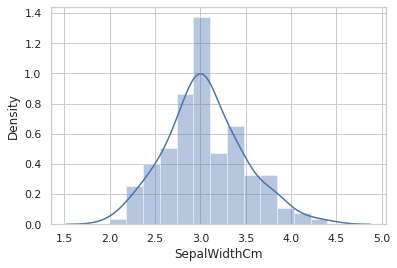

In [151]:
sns.distplot(dt['SepalWidthCm'])
plt.show()

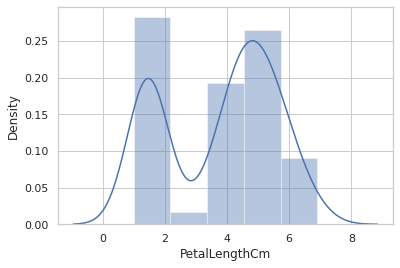

In [152]:
sns.distplot(dt['PetalLengthCm'])
plt.show()

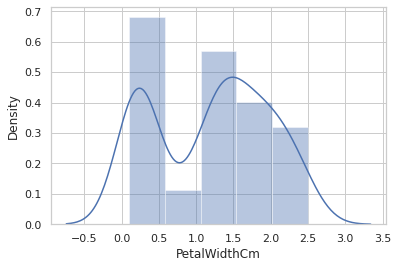

In [153]:
sns.distplot(dt['PetalWidthCm'])
plt.show()

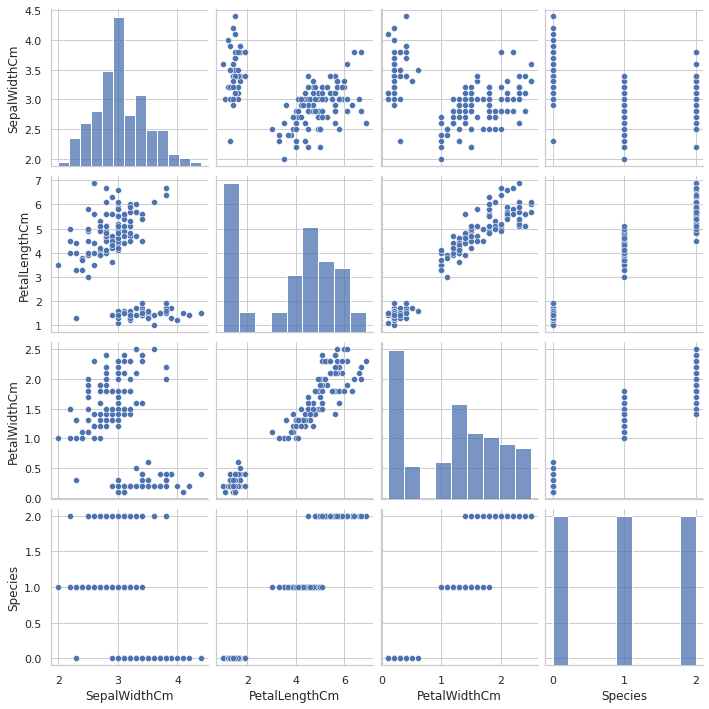

In [154]:
# Pairplot

sns.pairplot(dt.iloc[:,1:])
plt.show()

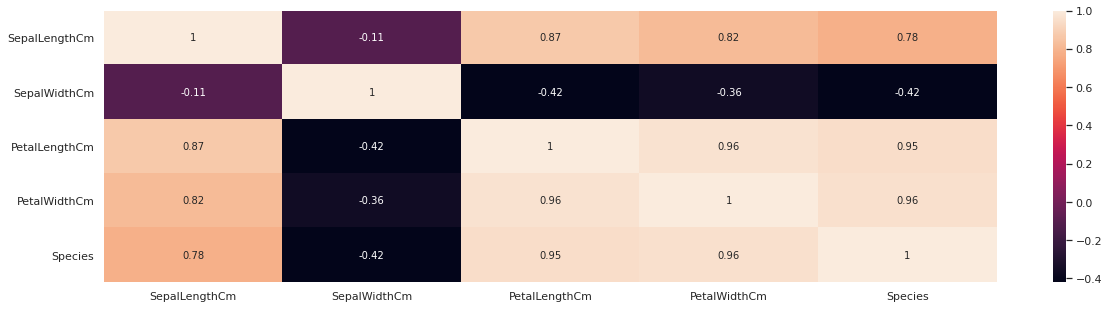

In [155]:
# Heatmap

plt.figure(figsize=(20,5))
sns.heatmap(dt.corr(), annot = True)

In [156]:
dt.mean()

SepalLengthCm    5.843333
SepalWidthCm     3.054000
PetalLengthCm    3.758667
PetalWidthCm     1.198667
Species          1.000000
dtype: float64

### **Elbow Method using within-cluster-sum-of-squares(wcss) :**

In [157]:
dt=dt.iloc[:,[0,1,2,3]].values

In [158]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(dt)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)
    
wcss

[680.8244,
 152.36870647733906,
 78.94084142614602,
 57.345409315718165,
 46.53558205128205,
 38.93873974358974,
 34.19068792479662,
 29.905374299825105,
 27.927882157034972,
 25.95549708624709]

### *Using Elbow graph to find optimum no. of Clusters :*

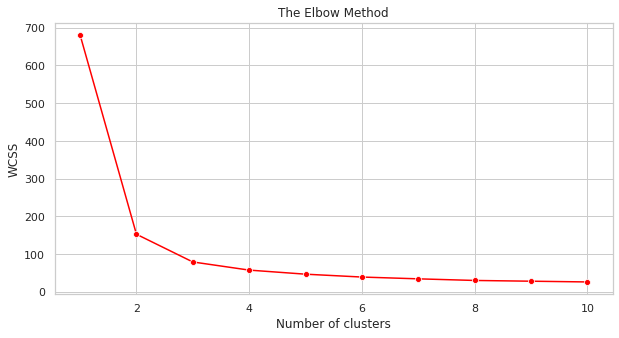

In [159]:
plt.figure(figsize=(10,5))
sns.set(style='whitegrid')
sns.lineplot(range(1, 11), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#### The optimum value for K would be 3. As we can see that with an increase in the number of clusters the WCSS value decreases. We select the value for K on the basis of the rate of decrease in WCSS and we can see that after 3 the drop in wcss is minimal.

### **Initialization using K-means++ :**

In [161]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 5)
y_kmeans = kmeans.fit_predict(dt)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

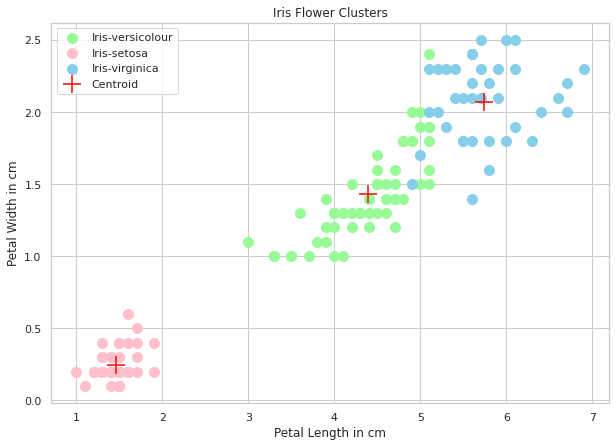

In [171]:
fig = plt.figure(figsize=(10, 7))
plt.title('Clusters with Centroids',fontweight ='bold', fontsize=20)
plt.scatter(dt[y_kmeans == 0, 2], dt[y_kmeans == 0, 3], s = 100, c = 'palegreen', label = 'Iris-versicolour')
plt.scatter(dt[y_kmeans == 1, 2], dt[y_kmeans == 1, 3], s = 100, c = 'pink', label = 'Iris-setosa')
plt.scatter(dt[y_kmeans == 2, 2], dt[y_kmeans == 2, 3],s = 100, c = 'skyblue', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:,3], s = 300, c = 'red',marker='+', 
            label = 'Centroid')
plt.title('Iris Flower Clusters')
plt.ylabel('Petal Width in cm')
plt.xlabel('Petal Length in cm')
plt.legend()

## **Task#2 is Executed**